# Source of The Dataset
* Own dataset

In [1]:
# loadin important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# read the dataset 

df = pd.read_excel('depression.xlsx')
df.columns = [c.strip() for c in df.columns]
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
print(df.shape)
df.head()

(747, 34)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,depression,category
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderate
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Regularly,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Sometimes,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Not at all,Very often,1,0 to 2,No,5,0,23,Severe
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Sometimes,Not at all,Very often,2,6 to 8,No,1,4,19,Moderate


In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  mood  has  5  unique values ---->  ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
Feature  age  has  16  unique values
Feature  gender  has  3  unique values ---->  ['Female' 'Male' 'Others']
Feature  subject  has  68  unique values
Feature  semester  has  21  unique values
Feature  sibilings  has  12  unique values
Feature  living  has  2  unique values ---->  ['With family' 'Without family']
Feature  employment  has  3  unique values ---->  ['Part time' 'None' 'Full time']
Feature  personality  has  3  unique values ---->  ['Extrovert' 'Ambivert' 'Introvert']
Feature  relationship  has  5  unique values ---->  ['In a relationship' 'Single' 'Engaged' 'Divorced' 'Married']
Feature  wakeup  has  76  unique values
Feature  breakfast  has  69  unique values
Feature  lunch  has  58  unique values
Feature  dinner  has  63  unique values
Feature  sleep  has  64  unique values
Feature  hobbies  has  184  unique values
Feature  smoker  has  2  unique values ---->  ['No' 'Yes']
Feature  alcoh

# Data Visualization

<AxesSubplot:xlabel='gender', ylabel='depression'>

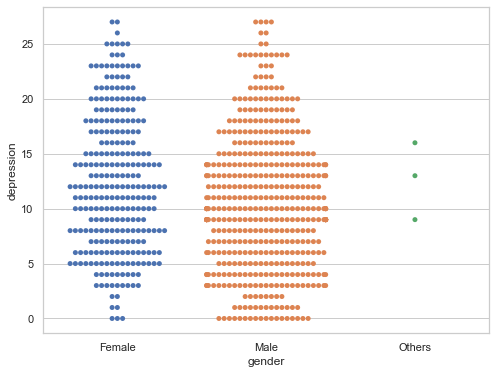

In [4]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.set_theme(style="whitegrid")
sns.swarmplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

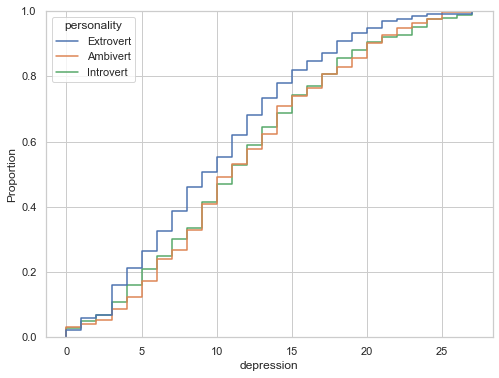

In [5]:
sns.ecdfplot(x = 'depression', data = df, hue = 'personality')

<AxesSubplot:xlabel='category', ylabel='Count'>

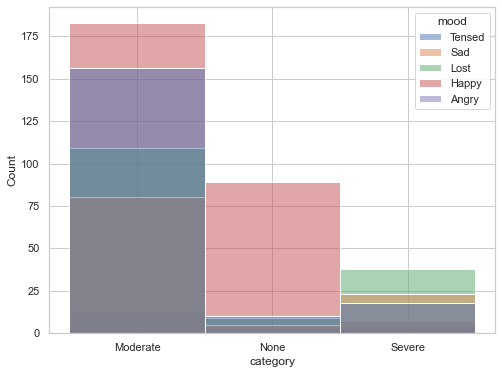

In [6]:
sns.histplot(x = 'category', data = df, hue = 'mood')

In [7]:
import collections

a = df['category']
counter = collections.Counter(a)
print(counter)
values = counter.values()
print(values)
keys = counter.keys()
print(keys)
print(counter.most_common(3))
print(dict(counter))

Counter({'Moderate': 541, 'None': 116, 'Severe': 90})
dict_values([541, 116, 90])
dict_keys(['Moderate', 'None', 'Severe'])
[('Moderate', 541), ('None', 116), ('Severe', 90)]
{'Moderate': 541, 'None': 116, 'Severe': 90}


([<matplotlib.patches.Wedge at 0x1a2a0e65cd0>,
 [Text(-0.712367983918724, 0.8381717338872583, 'Moderate'),
  Text(0.3522139864581941, -1.0420869962451442, 'None'),
  Text(1.0221398186796387, -0.40648516709660587, 'Severe')],
 [Text(-0.3885643548647585, 0.45718458212032265, '72.4%'),
  Text(0.19211671988628765, -0.5684110888609877, '15.5%'),
  Text(0.5575308101888937, -0.2217191820526941, '12.0%')])

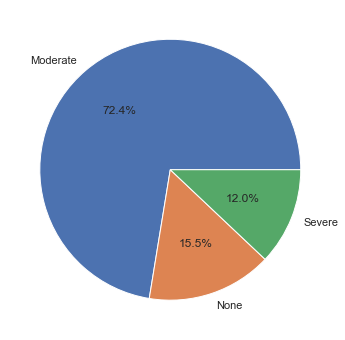

In [8]:
plt.pie(values, labels=keys, autopct='%1.1f%%')

# Data Pre-Processing Phase

In [9]:
df = df.drop(columns = ['hobbies', 'depression'])

# checing for null values

df.isnull().sum()

mood               0
age                0
gender             0
subject            0
semester           0
sibilings          0
living             0
employment         0
personality        0
relationship       0
wakeup             0
breakfast          0
lunch              0
dinner             0
sleep              0
smoker             0
alcoholic          0
drug_addicted      0
friends            0
hangout            0
social_events      0
pray               0
sports             0
exercise           0
meditation         0
video_games        0
study_hours        0
phone_hours        0
medication         1
movies_per_week    0
music_hours        0
category           0
dtype: int64

In [10]:
# remove null and uplicate entries

df.dropna(inplace = True)

# remove duplicate entries, if any

df.drop_duplicates(inplace = True)

print(df.shape)
df.describe()

(745, 32)


,age,semester,sibilings,friends,study_hours,movies_per_week,music_hours
count,745.000000,745.000000,745.000000,745.000000,745.00000,745.000000,745.000000
mean,22.540940,7.875168,1.728859,3.511409,2.80000,1.844295,1.734228
std,2.002351,3.970555,1.251467,2.770853,2.20861,2.218549,1.877777
min,17.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,2.000000,1.00000,0.000000,1.000000
50%,22.000000,8.000000,2.000000,3.000000,2.00000,1.000000,1.000000
75%,24.000000,11.000000,2.000000,5.000000,4.00000,3.000000,2.000000
max,33.000000,23.000000,13.000000,20.000000,10.00000,20.000000,10.000000


In [11]:
# observe dataset

for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

Happy     278
Tensed    183
Lost      156
Sad       108
Angry      20
Name: mood, dtype: int64

22    141
23    140
21    131
24    114
25     81
20     73
19     21
26     17
18     10
27      6
28      3
29      2
30      2
33      2
17      1
31      1
Name: age, dtype: int64

Male      468
Female    274
Others      3
Name: gender, dtype: int64

Engineering                  380
Business                     202
Pharmacy                      28
MBBS                          16
Law                           15
                            ... 
Social work                    1
life sciences                  1
Mathematics                    1
Environmental Science          1
Environmental management       1
Name: subject, Length: 68, dtype: int64

5     106
11     93
12     86
8      67
10     56
1      47
4      46
7      39
2      39
9      38
6      32
13     29
3      27
14     20
15      9
16      5
17      2
19      1
20      1
21      1
23      1
Name: semester, dtype: int64

1    

In [12]:
# Convert Catergorical values to numeric representation

df['smoker'].replace({'No':0, 'Yes':1}, inplace = True)
df['alcoholic'].replace({'No':0, 'Yes':1}, inplace = True)
df['medication'].replace({'No':0, 'Yes':1}, inplace = True)
df['drug_addicted'].replace({'No':0, 'Yes':1}, inplace = True)
df['pray'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['sports'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['hangout'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['phone_hours'].replace({'0 to 2': 0, '3 to 5': 1, '6 to 8':2, 'more than 8':3}, inplace = True)
df['exercise'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['meditation'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['video_games'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very often':3}, inplace = True)
df['social_events'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)

# df['employment'].replace({'None':0, 'Part time':1, 'Full time': 2}, inplace = True)

df.head()

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,sports,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,category
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,0,0,2,2,0,0,0,Moderate
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,1,2,1,1,4,0,0,5,0,None
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,0,1,0,0,3,2,0,0,0,Severe
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,0,0,0,3,1,0,0,5,0,Severe
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,1,1,0,3,2,2,0,1,4,Moderate


In [13]:
# Splitting hobbies in multiple cells

# df['hobbies'] = df['hobbies'].str.lower()
# df['hobbies'] = df['hobbies'].str.strip()
# df['hobbies'] = df['hobbies'].str.replace(', ', ',')
# df['hobbies'] = df['hobbies'].str.replace(' , ', ',')
# df['hobbies'] = df['hobbies'].str.replace(' ,', ',')

# for idx, row in df.iterrows():
#     for hobby in row.hobbies.split(","):
#         df.loc[idx, hobby] = 1

# df.fillna(0, inplace=True)
# df = df.drop(columns = ['hobbies'])
# df.columns = [c.strip() for c in df.columns]
# df.columns = [c.lower().replace(' ', '_') for c in df.columns]

print(df.shape)
df.head()

(745, 32)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,sports,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,category
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,0,0,2,2,0,0,0,Moderate
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,1,2,1,1,4,0,0,5,0,None
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,0,1,0,0,3,2,0,0,0,Severe
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,0,0,0,3,1,0,0,5,0,Severe
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,1,1,0,3,2,2,0,1,4,Moderate


<AxesSubplot:xlabel='age', ylabel='category'>

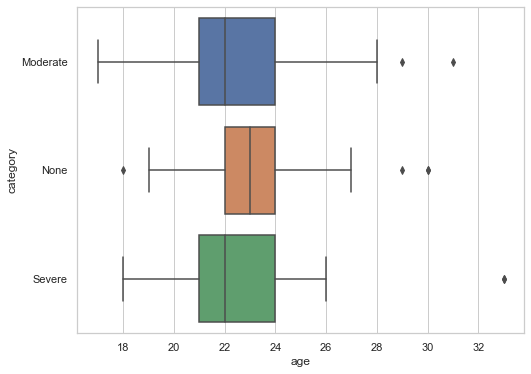

In [14]:
sns.boxplot(y='category', x='age', data=df)

<AxesSubplot:xlabel='semester', ylabel='category'>

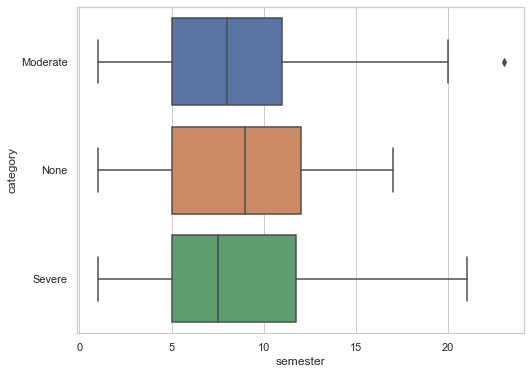

In [15]:
sns.boxplot(y='category', x='semester', data=df)

<AxesSubplot:xlabel='sibilings', ylabel='category'>

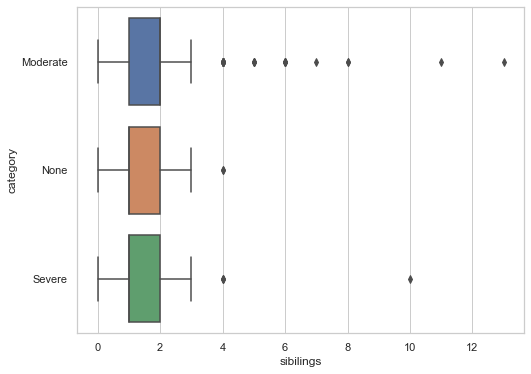

In [16]:
sns.boxplot(y='category', x='sibilings', data=df)

<AxesSubplot:xlabel='friends', ylabel='category'>

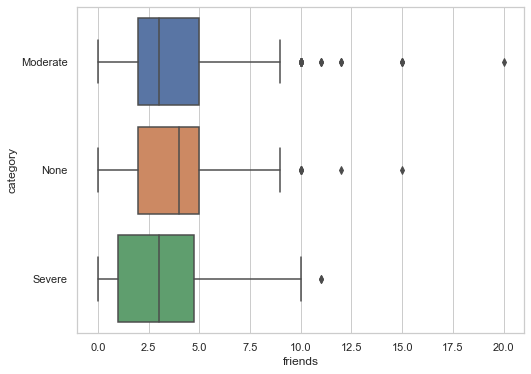

In [17]:
sns.boxplot(y='category', x='friends', data=df)

<AxesSubplot:xlabel='study_hours', ylabel='category'>

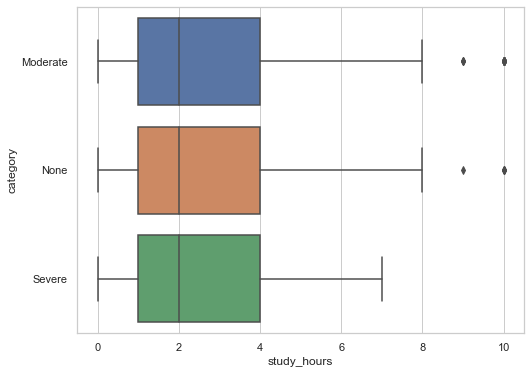

In [18]:
sns.boxplot(y='category', x='study_hours', data=df)

<AxesSubplot:xlabel='music_hours', ylabel='category'>

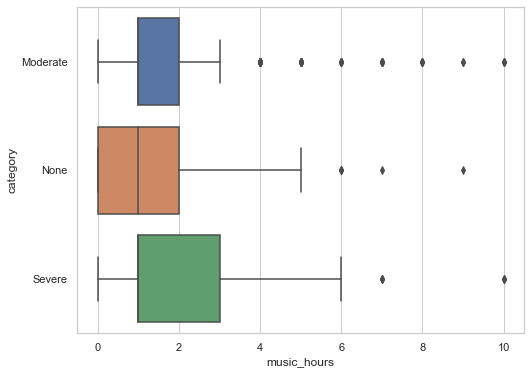

In [19]:
sns.boxplot(y='category', x='music_hours', data=df)

<AxesSubplot:xlabel='movies_per_week', ylabel='category'>

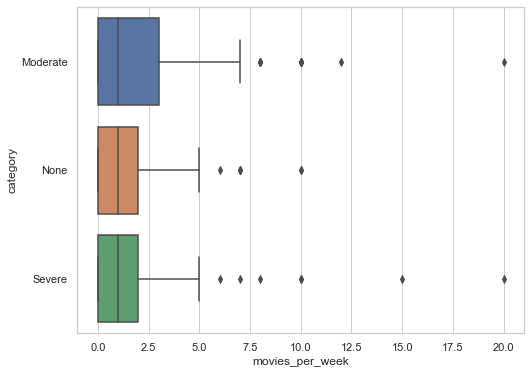

In [20]:
sns.boxplot(y='category', x='movies_per_week', data=df)

In [21]:
# settin limits for features

limit = {
    'age': 28,
    'semester': 23,
    'sibilings': 3,
    'friends': 9,
    'study_hours': 8,
    'music_hours': 3,
    'movies_per_week': 5,
}

# drop rows where limit exceed for features

for feature in limit:
    index = df.index[df[feature] > limit[feature]].tolist()
    df.drop(index = index, inplace = True)

print(df.shape)

# observe again

for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

(541, 32)
Happy     204
Tensed    142
Lost      113
Sad        71
Angry      11
Name: mood, dtype: int64

22    105
23    104
21     98
24     87
25     56
20     50
19     18
26      8
18      6
27      6
28      2
17      1
Name: age, dtype: int64

Male      330
Female    210
Others      1
Name: gender, dtype: int64

Engineering                                  264
Business                                     150
Pharmacy                                      22
Law                                           12
MBBS                                          11
Economics                                      9
English Literature                             7
Microbiology                                   4
Microbiology                                   3
Biochemistry                                   3
Biochemistry and Biotechnology                 3
English Linguistics                            3
Architecture                                   2
Biochemistry                              

In [22]:
# selecting categorical features

cat_features = df.select_dtypes(exclude='number').columns.tolist()
cat_features.remove('category')  # target column for category prediction
print(df.shape)
cat_features

(541, 32)


['mood',
 'gender',
 'subject',
 'living',
 'employment',
 'personality',
 'relationship',
 'wakeup',
 'breakfast',
 'lunch',
 'dinner',
 'sleep']

In [23]:
# convert categorical values to numeric representation

df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
0,24,9,3,0,0,0,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0
1,23,11,3,1,0,0,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,19,3,0,0,0,0,4,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,23,13,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,22,11,2,0,0,0,3,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.describe()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,22.441774,7.728281,1.565619,0.251386,0.096118,0.024030,3.142329,1.354898,1.103512,1.249538,...,0.003697,0.001848,0.001848,0.001848,0.001848,0.001848,0.001848,0.014787,0.005545,0.001848
std,1.816292,3.993758,0.853013,0.434212,0.295026,0.153283,2.088789,0.802611,0.843497,0.622588,...,0.060745,0.042993,0.042993,0.042993,0.042993,0.042993,0.042993,0.120813,0.074329,0.042993
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,8.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,11.000000,2.000000,1.000000,0.000000,0.000000,5.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.000000,23.000000,3.000000,1.000000,1.000000,1.000000,9.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [25]:
# feature-target splitting

X = df.drop(columns = ['category', ]) # X contains the features 
y = df['category']  # y contains target
print(X.shape)
X.head()

(541, 366)


,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
0,24,9,3,0,0,0,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0
1,23,11,3,1,0,0,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,19,3,0,0,0,0,4,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,23,13,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,22,11,2,0,0,0,3,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X.describe()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,22.441774,7.728281,1.565619,0.251386,0.096118,0.024030,3.142329,1.354898,1.103512,1.249538,...,0.003697,0.001848,0.001848,0.001848,0.001848,0.001848,0.001848,0.014787,0.005545,0.001848
std,1.816292,3.993758,0.853013,0.434212,0.295026,0.153283,2.088789,0.802611,0.843497,0.622588,...,0.060745,0.042993,0.042993,0.042993,0.042993,0.042993,0.042993,0.120813,0.074329,0.042993
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,8.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,11.000000,2.000000,1.000000,0.000000,0.000000,5.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.000000,23.000000,3.000000,1.000000,1.000000,1.000000,9.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
scale_vars = []
for cols in X.columns:
    if X[cols].dtype == np.int64 and X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'semester',
 'sibilings',
 'friends',
 'hangout',
 'social_events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video_games',
 'study_hours',
 'phone_hours',
 'movies_per_week',
 'music_hours']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(collections.Counter(y_train))
print(collections.Counter(y_test))
X_train.head()

(459, 366)
(82, 366)
Counter({'Moderate': 342, 'None': 67, 'Severe': 50})
Counter({'Moderate': 59, 'None': 15, 'Severe': 8})


,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
172,23,11,3,0,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
476,22,6,2,0,0,0,4,1,0,2,...,0,0,0,0,0,0,0,0,0,0
504,23,12,2,0,0,0,8,3,3,1,...,0,0,0,0,0,0,0,0,0,0
388,21,4,2,0,0,0,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
465,23,8,1,0,0,0,7,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# # Using SMOTE
# smt = SMOTE(random_state=12)
# print(collections.Counter(y_train))
# X_train, y_train = smt.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

# print(collections.Counter(y_train))
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

In [30]:
# using min_max scaler to scale features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [31]:
X_train.head()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
172,0.5,0.555556,1.000000,0,0,0,0.555556,0.333333,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
476,0.4,0.277778,0.666667,0,0,0,0.444444,0.333333,0.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
504,0.5,0.611111,0.666667,0,0,0,0.888889,1.000000,1.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
388,0.3,0.166667,0.666667,0,0,0,0.222222,0.333333,0.333333,1.0,...,0,0,0,0,0,0,0,0,0,0
465,0.5,0.388889,0.333333,0,0,0,0.777778,0.333333,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_test.head()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_14:30:00,sleep_15:00:00,sleep_15:30:00,sleep_20:00:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
102,0.3,0.166667,0.333333,0,0,0,0.111111,0.333333,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
552,0.7,0.388889,0.333333,0,0,0,0.222222,0.333333,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
535,0.5,0.333333,1.000000,0,0,0,0.111111,0.333333,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
517,0.5,0.666667,0.666667,1,0,0,0.000000,1.000000,0.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
203,0.4,0.222222,0.666667,0,0,0,0.333333,0.333333,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

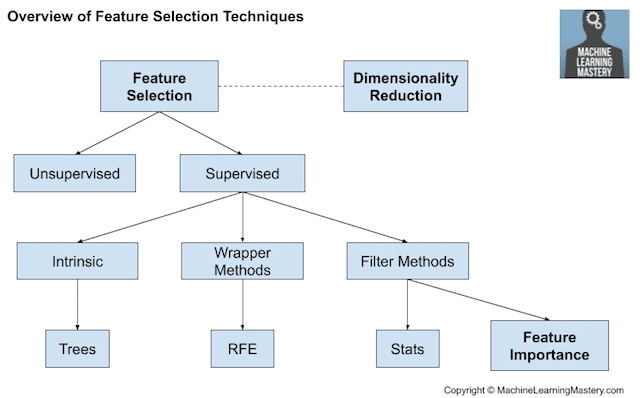

In [33]:
from IPython.display import display, Image
display(Image(filename='feature-selection-techniques.jpg'))

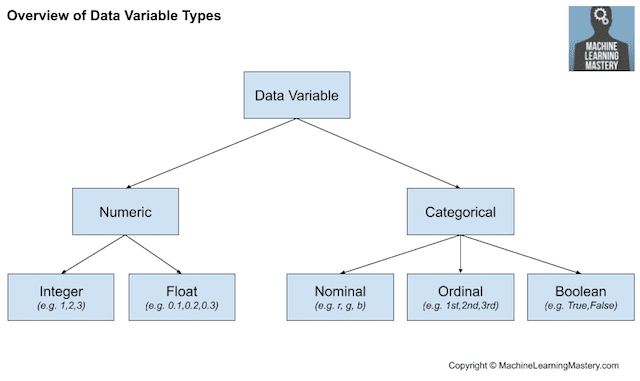

In [34]:
display(Image(filename='data-variable-types.jpg'))

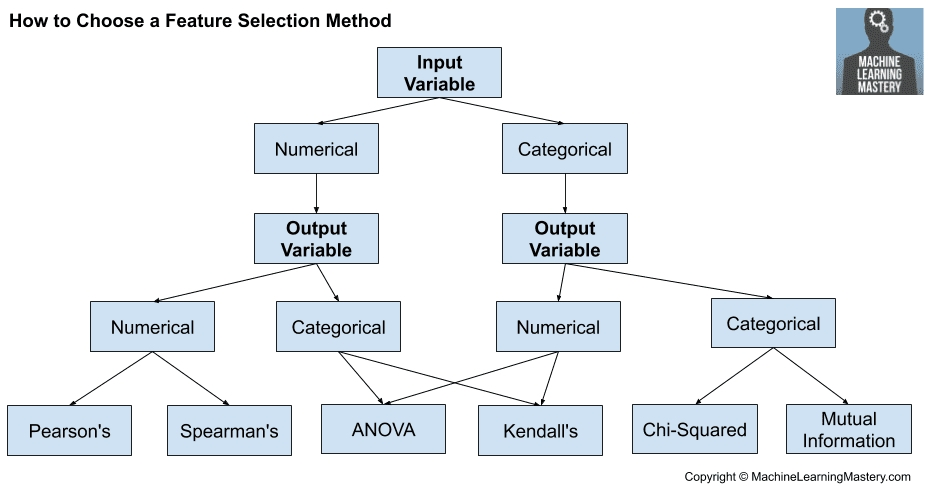

In [35]:
display(Image(filename='how-to-choose.jpg'))

## Applying Filter Methods

In [36]:
# Zero Variance

featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
X_train = X_train.drop(columns = featuresWithZeroVariance)
X_test = X_test.drop(columns = featuresWithZeroVariance)
print(X_train.shape)
print(X_test.shape)
print(len(featuresWithZeroVariance))
featuresWithZeroVariance

(459, 342)
(82, 342)
24


['subject_Environmental Science ',
 'subject_Environmental science and management ',
 'subject_Geography & Environment ',
 'subject_IT',
 'subject_Linguistics ',
 'subject_Mathematics ',
 'subject_Science ',
 'wakeup_00:00:00',
 'wakeup_04:50:00',
 'wakeup_10:20:00',
 'wakeup_11:17:00',
 'wakeup_13:40:00',
 'wakeup_21:00:00',
 'breakfast_08:10:00',
 'breakfast_13:07:00',
 'breakfast_22:00:00',
 'lunch_01:45:00',
 'dinner_10:15:00',
 'dinner_11:10:00',
 'dinner_22:38:00',
 'sleep_00:01:00',
 'sleep_00:20:00',
 'sleep_22:25:00',
 'sleep_22:30:00']

In [37]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
# sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1)

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train, 0.87) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

42
{'sleep_04:45:00', 'breakfast_13:01:00', 'lunch_16:04:00', 'wakeup_03:00:00', 'lunch_14:10:00', 'lunch_15:12:00', 'dinner_23:45:00', 'dinner_00:44:00', 'breakfast_11:20:00', 'gender_Male', 'sleep_11:20:00', 'lunch_17:03:00', 'dinner_22:11:00', 'dinner_22:45:00', 'breakfast_10:45:00', 'living_Without family', 'lunch_22:00:00', 'breakfast_17:30:00', 'lunch_16:20:00', 'lunch_16:45:00', 'employment_Part time', 'breakfast_04:45:00', 'sleep_02:11:00', 'relationship_Single', 'dinner_12:08:00', 'sleep_11:55:00', 'breakfast_02:00:00', 'dinner_23:09:00', 'dinner_21:47:00', 'sleep_03:45:00', 'breakfast_14:50:00', 'breakfast_00:08:00', 'breakfast_09:20:00', 'sleep_06:23:00', 'lunch_15:07:00', 'sleep_03:58:00', 'dinner_12:10:00', 'dinner_01:20:00', 'breakfast_12:11:00', 'dinner_11:50:00', 'breakfast_15:07:00', 'lunch_14:11:00'}


In [40]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(459, 300)
(82, 300)


## Applying Intrinsic Methods

                Features  Importances
124      wakeup_11:20:00     0.000008
255      dinner_22:15:00     0.000009
140   breakfast_01:10:00     0.000012
45   subject_Criminology     0.000015
168   breakfast_12:20:00     0.000018
..                   ...          ...
0                    age     0.029594
17       movies_per_week     0.031096
6                friends     0.033670
14           study_hours     0.034543
1               semester     0.037998

[300 rows x 2 columns]


<AxesSubplot:>

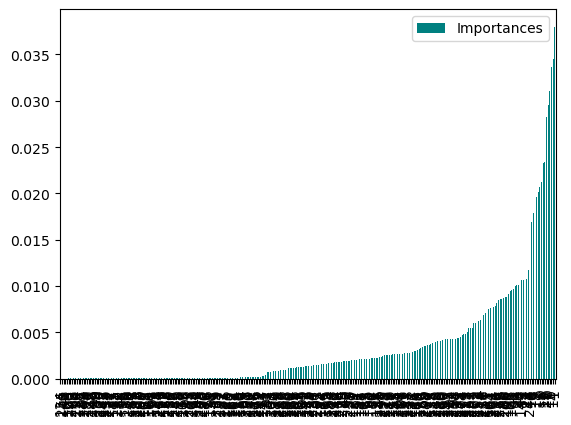

In [41]:
# Random Forest Importrance

from sklearn.ensemble import RandomForestClassifier
import matplotlib

model = RandomForestClassifier(n_estimators=3400)

model.fit(X_train, y_train)

importances = model.feature_importances_

final_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importances": importances
})

final_df = final_df.sort_values('Importances')
           
print(final_df)
final_df.head()

matplotlib.rc_file_defaults()
final_df.plot.bar(color = 'teal')

In [42]:
final_features = []
for index, row in final_df.iterrows():
    if row['Importances'] >= 0.01:
        print(row['Features'])
        final_features.append(row['Features'])
X_train = X_train[final_features]
X_test = X_test[final_features]
print(len(final_features))

personality_Introvert
smoker
personality_Ambivert
subject_Engineering
breakfast_09:00:00
relationship_In a relationship
gender_Female
meditation
mood_Lost
dinner_21:00:00
sports
social_events
hangout
music_hours
sibilings
video_games
pray
exercise
phone_hours
mood_Happy
age
movies_per_week
friends
study_hours
semester
25


# Model Creation and Evaluation(Predict Specific Category)

In [43]:
# importing classifiers

from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
skfold = StratifiedKFold(n_splits=5)

In [44]:
# # searcing for best parameters for DecisionTreeClassifier uisng GridSearchCV

# pca = PCA()
# std_slc = StandardScaler()
# dec_tree = DecisionTreeClassifier()

# pipe = Pipeline(steps=[('std_slc', std_slc),
#                            ('pca', pca),
#                            ('dec_tree', dec_tree)])

# n_components = list(range(1, X.shape[1] + 1, 1))
# criterion = ['gini', 'entropy']
# max_depth = np.arange(2, 12, 1)

# parameters = dict(pca__n_components=n_components,
#                   dec_tree__criterion=criterion,
#                   dec_tree__max_depth=max_depth)

# param_grid = {
#     'n_components': list(range(1, X.shape[1] + 1, 1)),
#     'criterion': ['gini', 'entropy'],
#     "max_depth": np.arange(2, 12, 1),
# }

# grid_search = GridSearchCV(pipe, parameters)
# grid_search.fit(X_train, y_train)
# cross_val_df = pd.DataFrame(grid_search.cv_results_)
# print(grid_search.best_score_)
# print(grid_search.best_params_)
# cross_val_df.head()

In [45]:
# # searcing for best parameters for KNeighborsClassifier uisng GridSearchCV

# param_grid = { 
#     'n_neighbors' : list(range(1, 20, 1)),
#     'weights' : ['uniform','distance'],
#     'metric' : ['minkowski','euclidean','manhattan'],
#     'p': [1, 2],
# }

# clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=param_grid, cv = 5)
# clf.fit(X_train, y_train)
# print(clf.best_score_)
# clf.best_params_

In [46]:
# # searcing for best parameters for RandomForestClassifier uisng GridSearchCV

# rfc=RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy'],
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)
# CV_rfc.fit(X_train, y_train)

# print(CV_rfc.best_score_)
# CV_rfc.best_params_

Train Accuracy:  0.7450980392156863
Test Accuracy:  0.7195121951219512


<AxesSubplot:title={'center':'ZerorR Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

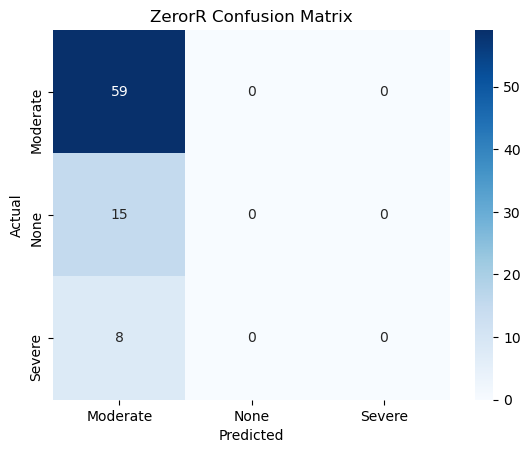

In [47]:
# ZeroR classifier

clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('ZerorR Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'ZerorR Classification Report'}>

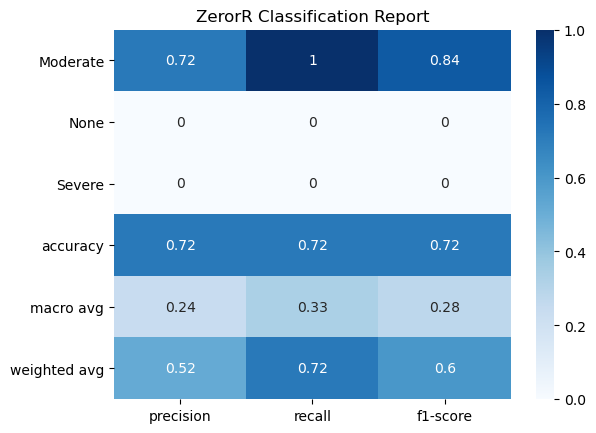

In [48]:
plt.title('ZerorR Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

In [49]:
# plt.title('ZerorR ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

2
Depth =  2 , Training Accuracy =  0.7472766884531591 , Test Accuracy =  0.6829268292682927 , Diff =  6.434985918486635  %
3
Depth =  3 , Training Accuracy =  0.7581699346405228 , Test Accuracy =  0.6951219512195121 , Diff =  6.30479834210107  %
Depth =  4 , Training Accuracy =  0.7777777777777778 , Test Accuracy =  0.6707317073170732 , Diff =  10.704607046070457  %
Depth =  5 , Training Accuracy =  0.8017429193899782 , Test Accuracy =  0.6951219512195121 , Diff =  10.662096817046606  %
Depth =  6 , Training Accuracy =  0.8300653594771242 , Test Accuracy =  0.6463414634146342 , Diff =  18.37238960624901  %
Depth =  7 , Training Accuracy =  0.869281045751634 , Test Accuracy =  0.6341463414634146 , Diff =  23.513470428821936  %
Depth =  8 , Training Accuracy =  0.906318082788671 , Test Accuracy =  0.6219512195121951 , Diff =  28.436686327647585  %
Depth =  9 , Training Accuracy =  0.9302832244008714 , Test Accuracy =  0.6219512195121951 , Diff =  30.83320048886763  %
Depth =  10 , Train

<AxesSubplot:title={'center':'Decision Tree Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

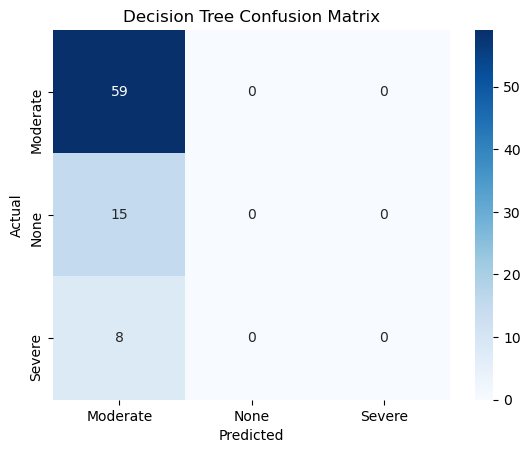

In [50]:
# Decision Tree

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
foldAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='gini')
    results = cross_val_score(clf, X_train, y_train, cv = skfold)
    foldAcc[index] = np.mean(results)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
#########################################
# Plot of training and test accuracies
#########################################

matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('Decision Tree Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Decision Tree Classification Report'}>

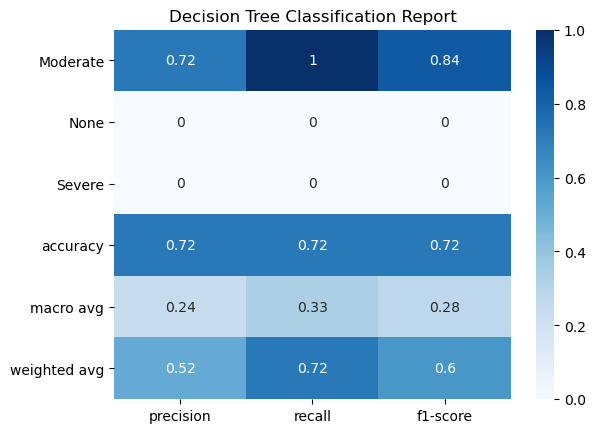

In [51]:
plt.title('Decision Tree Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

Text(0, 0.5, 'Accuracy')

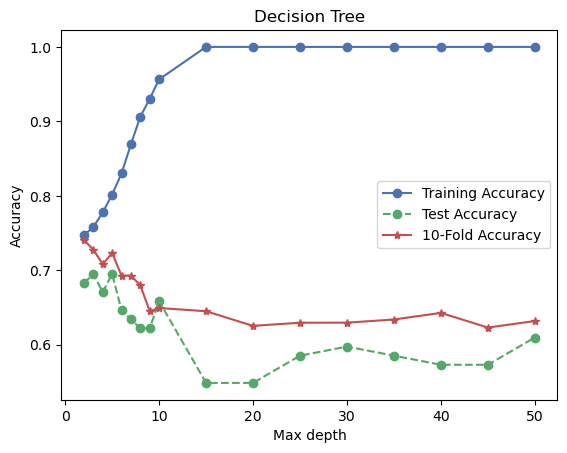

In [52]:
plt.title('Decision Tree')
plt.plot(maxdepths, trainAcc, 'bo-', maxdepths, testAcc, 'go--', maxdepths, foldAcc, 'r*-')
plt.legend(['Training Accuracy','Test Accuracy', '10-Fold Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [53]:
# plt.title('Decision Tree ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.6219512195121951 , Difference =  37.80487804878049 %
K =  5 , Training Accuracy =  0.7799564270152506  Test Accuracy =  0.7073170731707317 , Difference =  7.263935384451892 %
K =  10 , Training Accuracy =  0.7407407407407407  Test Accuracy =  0.7317073170731707 , Difference =  0.9033423667569984 %
K =  15 , Training Accuracy =  0.7472766884531591  Test Accuracy =  0.7317073170731707 , Difference =  1.5569371379988373 %
K =  20 , Training Accuracy =  0.7450980392156863  Test Accuracy =  0.7195121951219512 , Difference =  2.55858440937351 %
K =  25 , Training Accuracy =  0.7450980392156863  Test Accuracy =  0.7195121951219512 , Difference =  2.55858440937351 %
K =  30 , Training Accuracy =  0.7450980392156863  Test Accuracy =  0.7195121951219512 , Difference =  2.55858440937351 %


<AxesSubplot:title={'center':'K-Nearest Neighbour Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

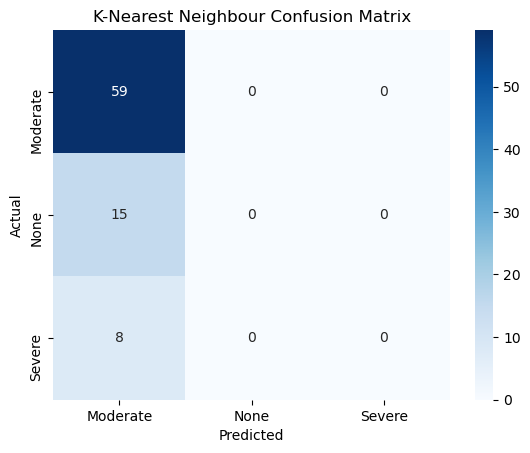

In [54]:
# K-Nearest Neighbour

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []
foldAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights = 'uniform', p=1)
    results = cross_val_score(clf, X, y, cv = skfold)
    foldAcc.append(np.mean(results))
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

clf = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', weights = 'uniform', p=1)
clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('K-Nearest Neighbour Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'K-Nearest Neighbour Classification Report'}>

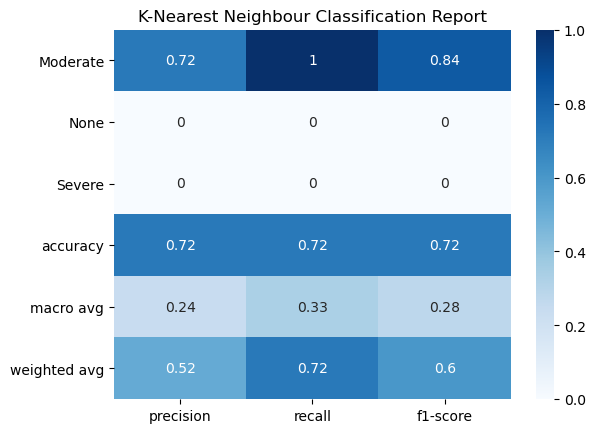

In [55]:
plt.title('K-Nearest Neighbour Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

Text(0, 0.5, 'Accuracy')

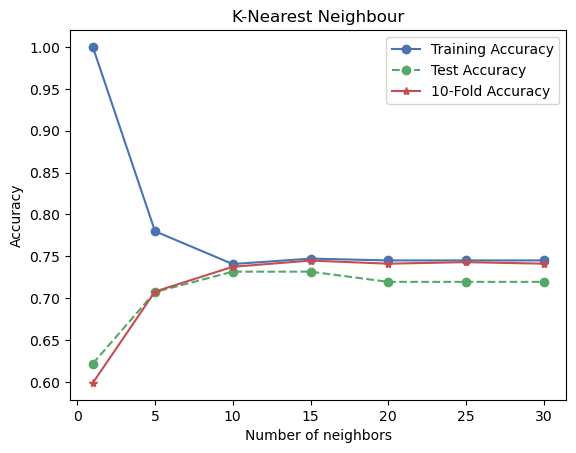

In [56]:
plt.title('K-Nearest Neighbour')
plt.plot(numNeighbors, trainAcc, 'bo-', numNeighbors, testAcc, 'go--', numNeighbors, foldAcc, 'r*-')
plt.legend(['Training Accuracy','Test Accuracy', '10-Fold Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [57]:
# plt.title('K-Nearest Neighbour ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

Logistic Regression with no regularization
Train Accuracy:  0.7603485838779956
Test Accuracy:  0.7560975609756098

Logistic Regression with L2 regularization
Train Accuracy:  0.7668845315904139
Test Accuracy:  0.7195121951219512


<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

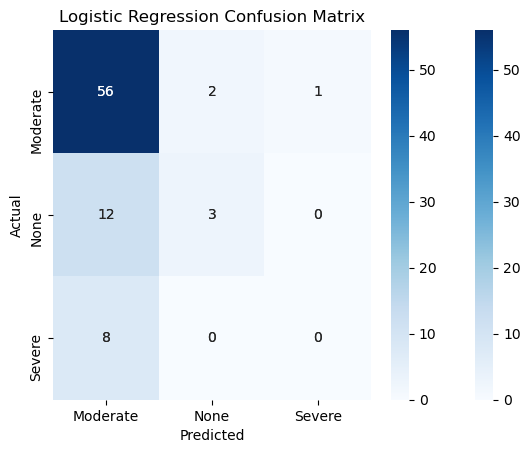

In [58]:
# Logistic Regression

clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True)
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Logistic Regression Classification Report'}>

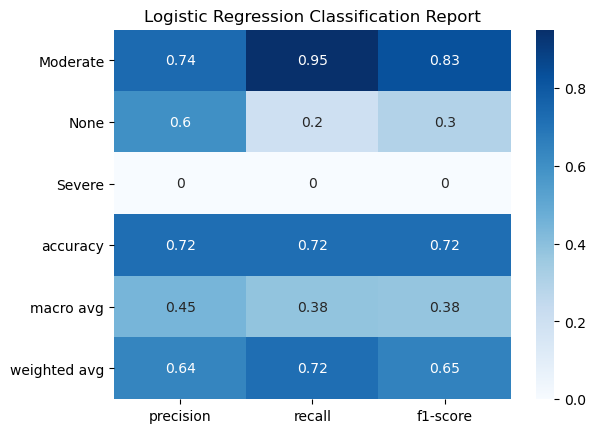

In [59]:
plt.title('Logistic Regression Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

In [60]:
# plt.title('Logistic Regression ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

2
Depth =  2 , Training Accuracy =  0.7450980392156863 , Test Accuracy =  0.7195121951219512 , Diff =  2.55858440937351  %
Depth =  3 , Training Accuracy =  0.7450980392156863 , Test Accuracy =  0.7195121951219512 , Diff =  2.55858440937351  %
Depth =  4 , Training Accuracy =  0.7450980392156863 , Test Accuracy =  0.7195121951219512 , Diff =  2.55858440937351  %
Depth =  5 , Training Accuracy =  0.7559912854030502 , Test Accuracy =  0.7195121951219512 , Diff =  3.647909028109897  %
Depth =  6 , Training Accuracy =  0.7930283224400871 , Test Accuracy =  0.7195121951219512 , Diff =  7.351612731813595  %
Depth =  7 , Training Accuracy =  0.8605664488017429 , Test Accuracy =  0.7195121951219512 , Diff =  14.105425367979175  %
Depth =  8 , Training Accuracy =  0.8997821350762527 , Test Accuracy =  0.7317073170731707 , Diff =  16.8074818003082  %
Depth =  9 , Training Accuracy =  0.9629629629629629 , Test Accuracy =  0.7195121951219512 , Diff =  24.34507678410117  %
Depth =  10 , Training Ac

<AxesSubplot:title={'center':'Random Forest Classifier Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

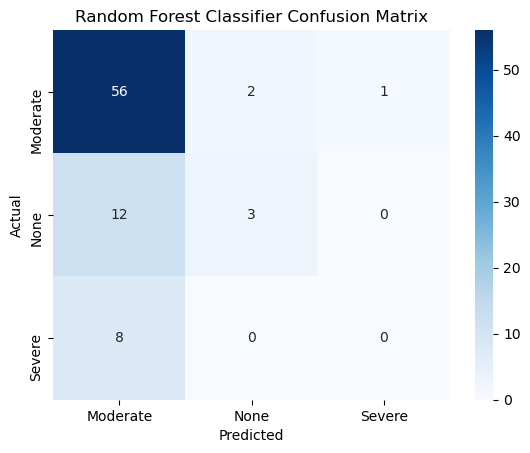

In [61]:
# Random Forest Classifier

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
foldAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = RandomForestClassifier(max_depth=depth, criterion = 'entropy',  max_features = 'auto', n_estimators = 200)
    results = cross_val_score(clf, X_train, y_train, cv = skfold)
    foldAcc[index] = np.mean(results)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = RandomForestClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
#########################################
# Plot of training and test accuracies
#########################################

clf = RandomForestClassifier(max_depth = 6, criterion = 'entropy',  max_features = 'auto', n_estimators = 200)
clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('Random Forest Classifier Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Random Forest Classifier Classification Report'}>

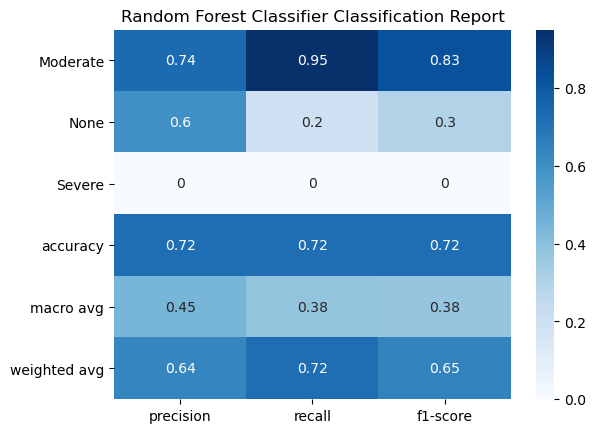

In [62]:
plt.title('Random Forest Classifier Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

Text(0, 0.5, 'Accuracy')

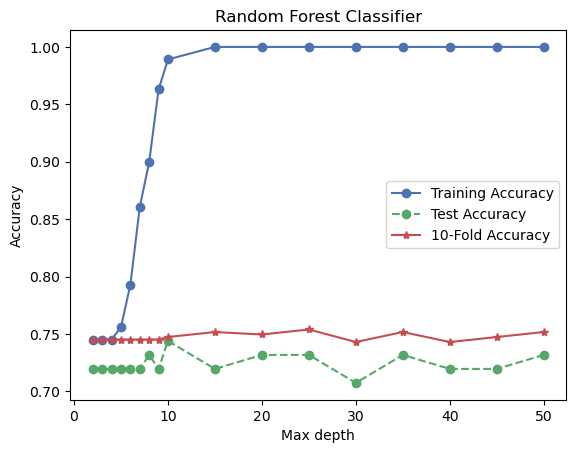

In [63]:
plt.title('Random Forest Classifier')
plt.plot(maxdepths, trainAcc, 'bo-', maxdepths, testAcc, 'go--', maxdepths, foldAcc, 'r*-')
plt.legend(['Training Accuracy','Test Accuracy', '10-Fold Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [64]:
# plt.title('Random Forest Classifier ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

Train Accuracy:  0.7233115468409586
Test Accuracy:  0.6097560975609756


<AxesSubplot:title={'center':'Perceptron Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

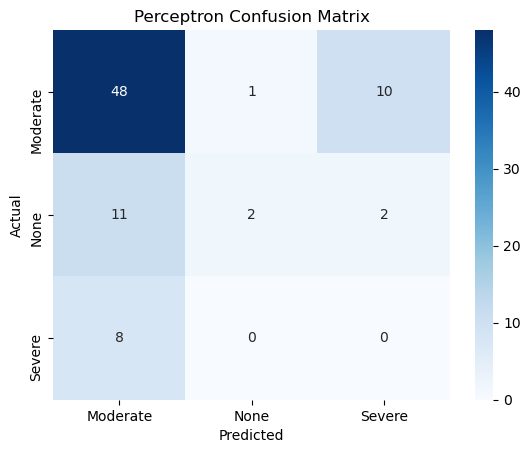

In [65]:
# Perception

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('Perceptron Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Perceptron Classification Report'}>

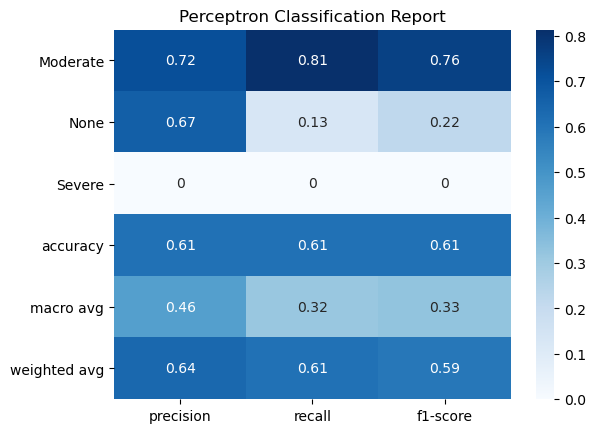

In [66]:
plt.title('Perceptron Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

In [67]:
# plt.title('Perceptron CROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

Train Accuracy:  0.7559912854030502
Test Accuracy:  0.7560975609756098


<AxesSubplot:title={'center':'Multinomial Naive Bayes Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

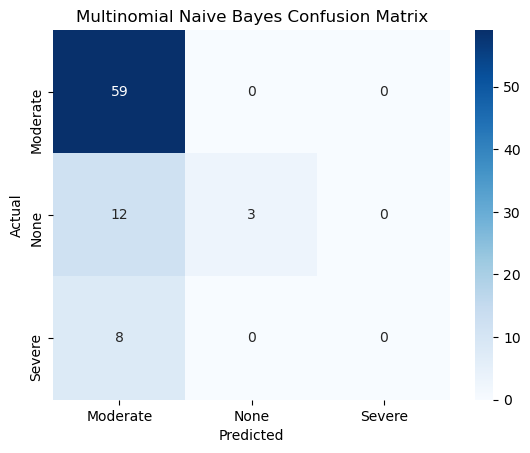

In [68]:
# Multinomial Naive Bayes

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('Multinomial Naive Bayes Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Multinomial Naive Bayes Classification Report'}>

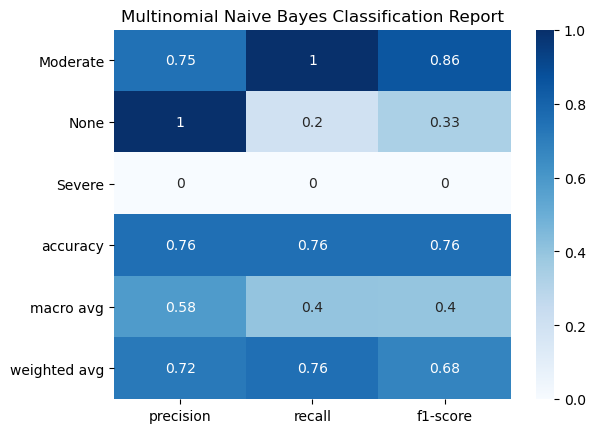

In [69]:
plt.title('Multinomial Naive Bayes Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

In [70]:
# plt.title('Multinomial Naive Bayes ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)

Train Accuracy:  0.7450980392156863
Test Accuracy:  0.7195121951219512


<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

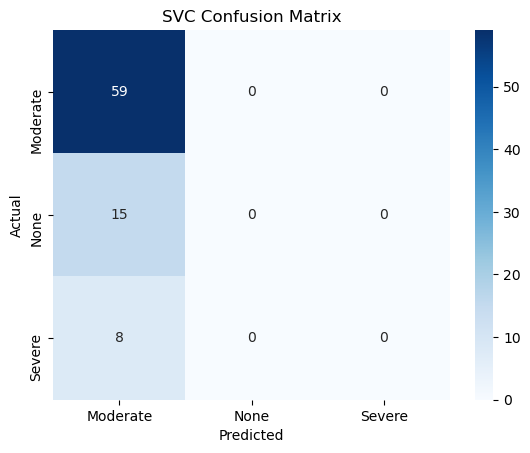

In [71]:
# SVC

clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
matrix = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.title('SVC Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'SVC Classification Report'}>

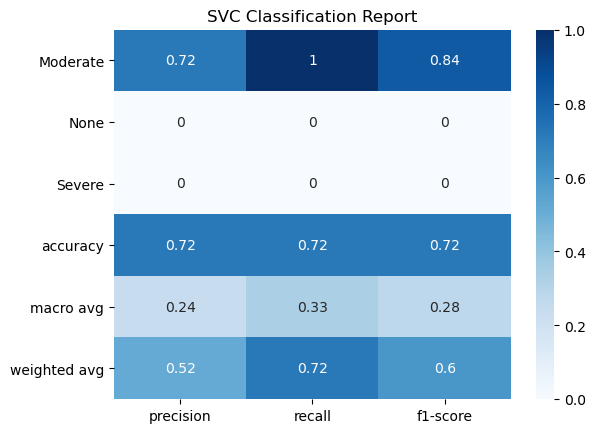

In [72]:
plt.title('SVC Classification Report')
clf_report = classification_report(y_test, y_pred_test, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Blues", annot=True)

In [73]:
# plt.title('SVC ROC Curve')
# metrics.plot_roc_curve(clf, X_test, y_test)